# Logistic Regression

In [12]:
import os
os.chdir('C:/Sereda/Lectures/Springboard/Capstone2_CustomerChurn/')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 600)

#### Import `df`

In [13]:
df = pd.read_csv('data/df.csv')
df.head()

,is_churn,city_0.0,city_1.0,city_3.0,city_4.0,city_5.0,city_6.0,city_7.0,city_8.0,city_9.0,...,discount_30.0,discount_120.0,discount_149.0,registration_weekday_0.0,registration_weekday_1.0,registration_weekday_2.0,registration_weekday_3.0,registration_weekday_4.0,registration_weekday_5.0,registration_weekday_6.0
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Explanatory and response variables

In [14]:
X = df.drop('is_churn', axis=1) # drop unknown churn
y = df[['is_churn']]
y = np.ravel(y)
y[:5]

array([0., 0., 1., 0., 0.])

#### Train-Test split
Taking 70% for training set and 30% for test set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Train samples:",y_train.shape[0])
print("Test samples:",y_test.shape[0])

Train samples: 2324
Test samples: 996


#### Trial run with Cross-Validation
A more reliable way of validating the model and optimizing its parameters is by cross-validation.

In [16]:
print("Example of cross-validation:")
log_reg_cv = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
scores = cross_val_score(log_reg_cv, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores.min(), scores.mean(), scores.max()

Example of cross-validation:
Cross-Validation Accuracy Scores [0.91416309 0.88412017 0.90128755 0.90128755 0.89655172 0.88793103
 0.90517241 0.90086207 0.94396552 0.88793103]


(0.8841201716738197, 0.9023272162202159, 0.9439655172413793)

### Optimization of C

Optimize regularization parameter C using cross-validation
Optimal C = 0.1
Highest accuracy = 0.909638153026491


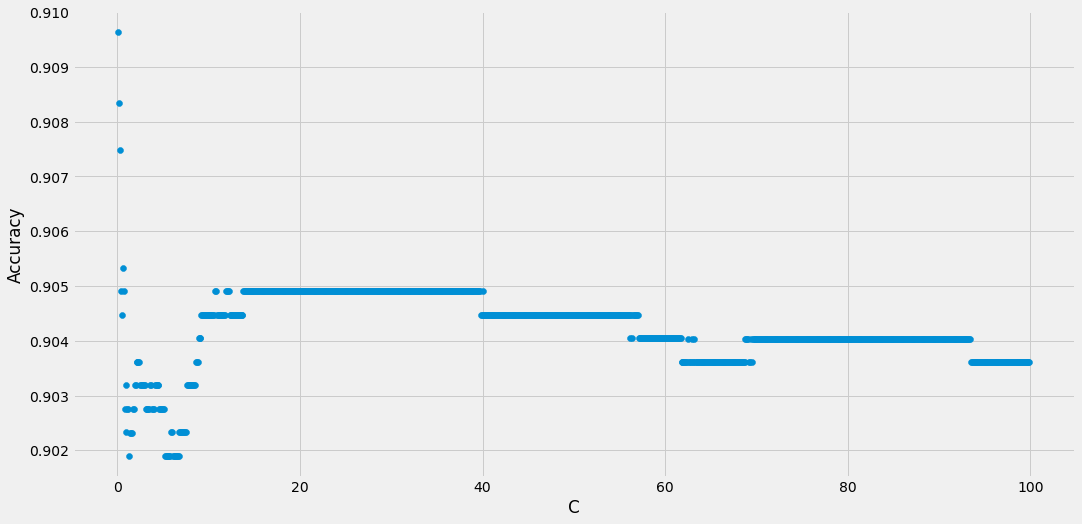

In [10]:
print('Optimize regularization parameter C using cross-validation')
accuracy = pd.DataFrame({'C':[],'Accuracy':[]})
acc_opt = 0
for C in np.arange(0.1, 100.0, 0.1):
    C = round(C,1)
    log_reg = LogisticRegression(solver='liblinear', C=C, random_state=0)
    scores = cross_val_score(log_reg, X_train, y_train, cv=10) # accuracies of cv cross-validations
    acc = scores.mean()
    accuracy = accuracy.append({'C':C,'Accuracy':acc}, ignore_index=True)
    if acc_opt < acc:
        acc_opt = acc
        C_opt = C
print('Optimal C =',C_opt)
print('Highest accuracy =',acc_opt)
fig, axs = plt.subplots(figsize = (16,8))
plt.scatter(accuracy['C'],accuracy['Accuracy']);
plt.xlabel('C');
plt.ylabel('Accuracy');

Optimize regularization parameter C using cross-validation
Optimal C = 0.04
Highest accuracy = 0.9126553944058013


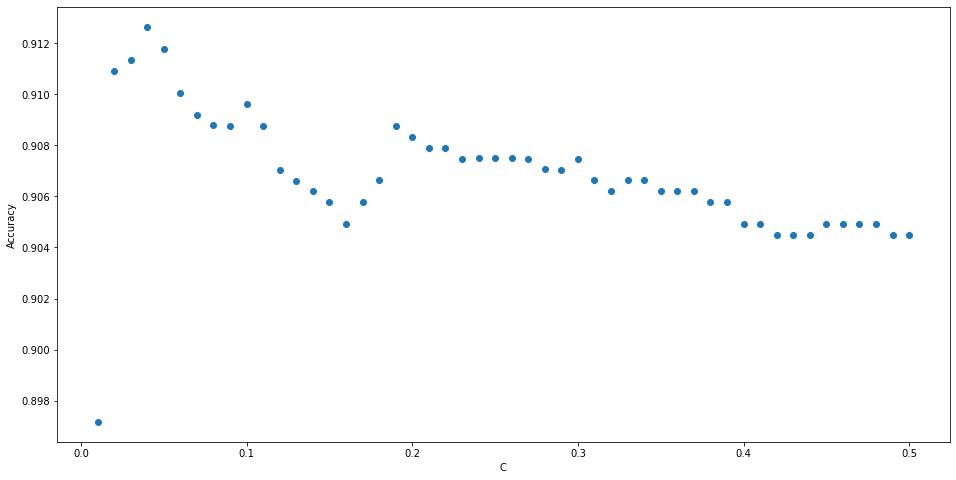

In [41]:
print('Detailed optimization')
accuracy = pd.DataFrame({'C':[],'Accuracy':[]})
acc_opt = 0
for C in np.arange(0.01, 0.51, 0.01):
    C = round(C,2)
    log_reg = LogisticRegression(solver='liblinear', C=C, random_state=0)
    scores = cross_val_score(log_reg, X_train, y_train, cv=10) # accuracies of cv cross-validations
    acc = scores.mean()
    accuracy = accuracy.append({'C':C,'Accuracy':acc}, ignore_index=True)
    if acc_opt < acc:
        acc_opt = acc
        C_opt = C
print('Optimal C =',C_opt)
print('Highest accuracy =',acc_opt)
fig, axs = plt.subplots(figsize = (16,8))
plt.scatter(accuracy['C'],accuracy['Accuracy']);
plt.xlabel('C');
plt.ylabel('Accuracy');

Optimize regularization parameter C using cross-validation
Optimal C = 0.044
Highest accuracy = 0.9130845789551577


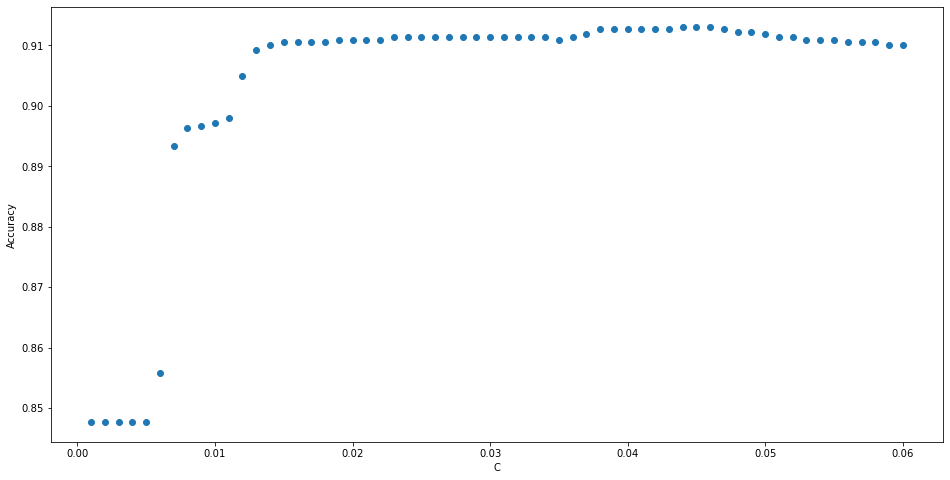

In [43]:
print('Detailed optimization')
accuracy = pd.DataFrame({'C':[],'Accuracy':[]})
acc_opt = 0
for C in np.arange(0.001, 0.061, 0.001):
    C = round(C,3)
    log_reg = LogisticRegression(solver='liblinear', C=C, random_state=0)
    scores = cross_val_score(log_reg, X_train, y_train, cv=10) # accuracies of cv cross-validations
    acc = scores.mean()
    accuracy = accuracy.append({'C':C,'Accuracy':acc}, ignore_index=True)
    if acc_opt < acc:
        acc_opt = acc
        C_opt = C
print('Optimal C =',C_opt)
print('Highest accuracy =',acc_opt)
fig, axs = plt.subplots(figsize = (16,8))
plt.scatter(accuracy['C'],accuracy['Accuracy']);
plt.xlabel('C');
plt.ylabel('Accuracy');

### Quality metrics

In [22]:
def confusion_matrix_plot(y_actual, y_predicted):
    '''Plot Binary Confusion Matrix for actual and predicted labels'''
    #from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_actual, y_predicted)
    tn = cm[0,0] # true negative count
    fp = cm[0,1] # false positive count
    fn = cm[1,0] # false negative count
    tp = cm[1,1] # true positive count
    print("[[TN, FP], [FN, TP]] =\n",cm) # print confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red') # counts
    plt.show();
    return tn,fp,fn,tp

Optimized C in Logistic Regression with 10-fold Cross-Validation:
Accuracy = 0.9146586345381527
[[TN, FP], [FN, TP]] =
 [[844   9]
 [ 76  67]]


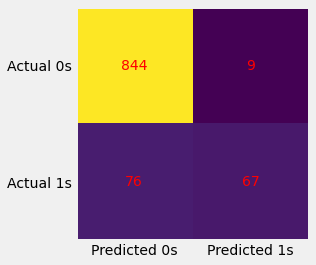

In [49]:
C_opt=0.044
print('Optimized C in Logistic Regression with 10-fold Cross-Validation:')
log_reg = LogisticRegression(solver='liblinear', C=C_opt, random_state=0) # Create a model
log_reg.fit(X_train, y_train) # Train model using training set
y_pred = log_reg.predict(X_test) # predicted values
print("Accuracy =",log_reg.score(X_test, y_test)) # proportion of correct predictions
tn,fp,fn,tp = confusion_matrix_plot(y_test, y_pred)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       853
         1.0       0.88      0.47      0.61       143

    accuracy                           0.91       996
   macro avg       0.90      0.73      0.78       996
weighted avg       0.91      0.91      0.90       996



In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Recall =', recall_score(y_test, pred_cv))
# tpr = tp/(tp + fn) Recall, sensitivity, proportion of the positive class 1 got correctly classified.
print('Precision =', precision_score(y_test, pred_cv))
print('F1 score =', f1_score(y_test, pred_cv))
fnr = fn/(tp + fn)
print(f"FNR = {round(fnr,4)} Proportion of the positive class 1 got incorrectly classified.")
tnr = tn/(tn + fp)
print(f"TNR = {round(tnr,4)} Specificity, proportion of the negative class 0 got correctly classified.")
fpr = fp/(tn + fp)
print(f"FPR = {round(fpr,4)} Specificity, proportion of the negative class 0 got incorrectly classified.")
MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"MCC = {round(MCC,4)} Matthews correlation coefficient: accounts for all 4 confusion matrix categories.")

Recall = 0.46853146853146854
Precision = 0.881578947368421
F1 score = 0.6118721461187215
FNR = 0.5315 Proportion of the positive class 1 got incorrectly classified.
TNR = 0.9894 Specificity, proportion of the negative class 0 got correctly classified.
FPR = 0.0106 Specificity, proportion of the negative class 0 got incorrectly classified.
MCC = 0.6049 Matthews correlation coefficient: accounts for all 4 confusion matrix categories.


### ROC - AUC, Optimization of classification threshold
Area Under the Curve (AUC) of Receiver Characteristic Operator (ROC) helps us visualize how well our machine learning classifier is performing and choose the optimal classification threshold probability.

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

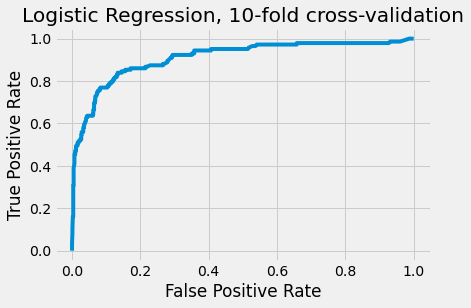

AUC: 0.910


In [47]:
prob_y = log_reg_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, prob_y, pos_label=1, drop_intermediate=False)
plt.plot(fpr, tpr, linestyle='-', label='Logistic')
plt.title('Logistic Regression, 10-fold cross-validation')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend() # show the legend
plt.show()
print('AUC: %.3f' % roc_auc_score(y_test, prob_y))

Manual ROC curve with controllable no. of threshold probabilities.

FPR = [1.         1.         1.         0.9144197  0.57327081 0.41031653
 0.38569754 0.36694021 0.35756155 0.35756155 0.35287222 0.34818288
 0.33177022 0.30715123 0.28956624 0.23446659 0.1852286  0.16178195
 0.13716295 0.11957796 0.10433763 0.09378664 0.08675264 0.07737397
 0.07620164 0.07385698 0.07385698 0.07385698 0.07268464 0.06799531
 0.06565064 0.06447831 0.06213365 0.06096131 0.05275498 0.04454865
 0.03634232 0.03282532 0.02813599 0.02344666 0.01875733 0.01641266
 0.01289566 0.01289566 0.01289566 0.01172333 0.01172333 0.01172333
 0.010551   0.010551   0.010551   0.00937866 0.00937866 0.00937866
 0.00937866 0.00937866 0.00937866 0.00937866 0.00820633 0.00820633
 0.00820633 0.00820633 0.00820633 0.00820633 0.00820633 0.00820633
 0.00820633 0.007034   0.007034   0.007034   0.007034   0.007034
 0.007034   0.00468933 0.00468933 0.00468933 0.00468933 0.00234467
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

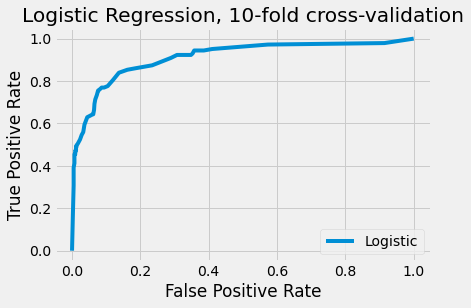

AUC: 0.910


In [45]:
pred_prob = log_reg.predict_proba(X_test) # probability of y=0 (1st column) and y=1 (2nd column)
prob_step = 0.01
fpr = np.empty(int(1+1/prob_step))
tpr = np.empty(int(1+1/prob_step))
j = 0 # counter of points
thresholds = np.arange(0, 1+prob_step, prob_step)
for prob_thresh in thresholds:
    tn = 0; fn = 0; tp = 0; fp = 0;
    for i in range(pred_prob.shape[0]): # each test case
        if pred_prob[i,1] >= prob_thresh: # classify as 1
            if y_test[i] == 0: # actual 0
                fp = fp+1
            else: # actual 1
                tp = tp+1
        else: # classify as 0
            if y_test[i] == 0: # actual 0
                tn = tn+1
            else: # actual 1
                fn = fn+1
    fpr[j] = fp/(tn + fp) # specificity
    tpr[j] = tp/(tp + fn) # sensitivity
    j = j+1
print("FPR =",fpr)
print("TPR =",fpr)
# ROC curve
plt.plot(fpr, tpr, linestyle='-', label='Logistic')
plt.title('Logistic Regression, 10-fold cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() # show the legend
plt.show()
print('AUC: %.3f' % roc_auc_score(y_test, pred_prob[:,1]))

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
THRESHOLD = 0.5
preds = np.where(log_reg_cv.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.914659
recall,0.468531
precision,0.881579
roc_auc_score,0.728990


### Optimize decision threshold

In [41]:
# calculate the squared g-mean for each threshold
gmeans_sq = tpr*(1-fpr)
# locate the index of the largest g-mean
ix = np.argmax(gmeans_sq)
print('Best Threshold=%.4f, G-Mean_sq=%.4f' % (thresh[ix], gmeans_sq[ix]))
print('FPR=%.4f, TPR=%.4f' % (fpr[ix], tpr[ix]))

from sklearn.metrics import accuracy_score, recall_score, precision_score
THRESHOLD = thresh[ix]
preds = np.where(log_reg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

Best Threshold=0.7155, G-Mean_sq=0.7241
FPR=0.1372, TPR=0.8392


,0
accuracy,0.909639
recall,0.412587
precision,0.907692
roc_auc_score,0.702777


### Optimize solver

Optimize C using 10-fold cross-validation, lbfgs solver
Optimal C = 0.1
Highest accuracy = 0.9087760840609738


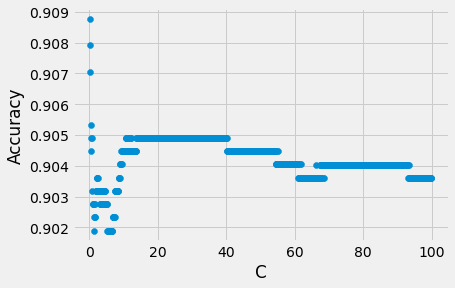

In [42]:
print('Optimize C using 10-fold cross-validation, lbfgs solver')
log_reg_lbfgs = LogisticRegression(solver='lbfgs')
accuracy = pd.DataFrame({'C':[],'Accuracy':[]})
acc_opt = 0
for C in np.arange(0.1, 100.0, 0.1):
    C = round(C,1)
    log_reg_cv_lbfgs = LogisticRegression(solver='lbfgs', C=C, random_state=0, max_iter=3000)
    scores = cross_val_score(log_reg_cv_lbfgs, X_train, y_train, cv=10) # accuracies of cv cross-validations
    acc = scores.mean()
    accuracy = accuracy.append({'C':C,'Accuracy':acc}, ignore_index=True)
    if acc_opt < acc:
        acc_opt = acc
        C_opt = C
    #if C % 10 == 0: print("C =",C)
print('Optimal C =',C_opt)
print('Highest accuracy =',acc_opt)
plt.scatter(accuracy['C'],accuracy['Accuracy']);
plt.xlabel('C');
plt.ylabel('Accuracy');

In [ ]:
print('Optimize C using 10-fold cross-validation, lbfgs solver')
log_reg_lbfgs = LogisticRegression(solver='lbfgs')
accuracy = pd.DataFrame({'C':[],'Accuracy':[]})
acc_opt = 0
for C in np.arange(0.01, 10.01, 0.01):
    #C = round(C,1)
    log_reg_cv_lbfgs = LogisticRegression(solver='lbfgs', C=C, random_state=0, max_iter=3000)
    scores = cross_val_score(log_reg_cv_lbfgs, X_train, y_train, cv=10) # accuracies of cv cross-validations
    acc = scores.mean()
    accuracy = accuracy.append({'C':C,'Accuracy':acc}, ignore_index=True)
    if acc_opt < acc:
        acc_opt = acc
        C_opt = C
    #if C % 10 == 0: print("C =",C)
print('Optimal C =',C_opt)
print('Highest accuracy =',acc_opt)
plt.scatter(accuracy['C'],accuracy['Accuracy']);
plt.xlabel('C');
plt.ylabel('Accuracy');

Optimize C using 10-fold cross-validation, lbfgs solver


In [120]:
C_opt=0.04
log_reg_cv_lbfgs = LogisticRegression(solver='lbfgs', C=C_opt, random_state=0, max_iter=3000)
log_reg_cv_lbfgs.fit(X_test, y_test)
scores = cross_val_score(log_reg_cv_lbfgs, X_train, y_train, cv=10) # accuracies of cv cross-validations
acc = scores.mean()
print("Accuracy =",acc)
prob_cv_lbfgs = log_reg_cv_lbfgs.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, prob_cv_lbfgs, pos_label=1, drop_intermediate=False)

Accuracy = 0.9126553944058013


In [121]:
### Optimize decision threshold
# calculate the squared g-mean for each threshold
gmeans_sq = tpr*(1-fpr)
# locate the index of the largest g-mean
ix = np.argmax(gmeans_sq)
print('Best Threshold=%.4f, G-Mean_sq=%.4f' % (thresh[ix], gmeans_sq[ix]))
print('FPR=%.4f, TPR=%.4f' % (fpr[ix], tpr[ix]))

from sklearn.metrics import accuracy_score, recall_score, precision_score
THRESHOLD = thresh[ix]
preds = np.where(log_reg_cv.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

Best Threshold=0.1697, G-Mean_sq=0.6975
FPR=0.1688, TPR=0.8392


,0
accuracy,0.838353
recall,0.853147
precision,0.465649
roc_auc_score,0.844510
